In [1]:
#regression problem : output contineous numeric
# for eg house price / sales price / stock price etc
#automobile data.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
df=pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
#to check datatypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [8]:
df['normalized-losses'].replace('?',np.nan,inplace=True)

<Axes: >

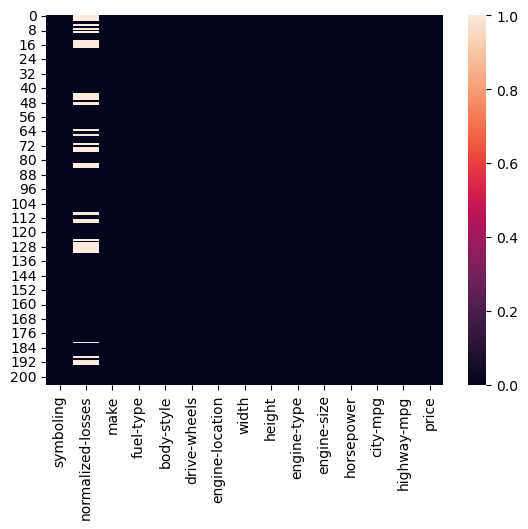

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['normalized-losses']=df['normalized-losses'].astype("float")

In [11]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [12]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [13]:
df['horsepower']=df['horsepower'].astype(float)

In [14]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [16]:
df['horsepower'].isnull().sum()/df.shape[0]*100

0.975609756097561

In [17]:
df['normalized-losses'].isnull().sum()/df.shape[0]*100

20.0

In [18]:
m=df["normalized-losses"].mean()
df["normalized-losses"].fillna(m,inplace=True)
m=df["horsepower"].mean()
df["horsepower"].fillna(m,inplace=True)

In [19]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
#separate numerical type column and object type column and store in new dataset
df_num=df.select_dtypes(["int64","float64"])#hold to int and float type data 
df_cat=df.select_dtypes(object)#hold object type data

In [21]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

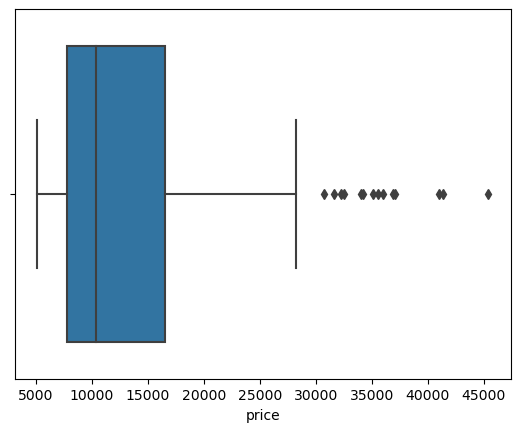

In [22]:
#use boxplot()
sns.boxplot(data=df,x="price")
plt.show()

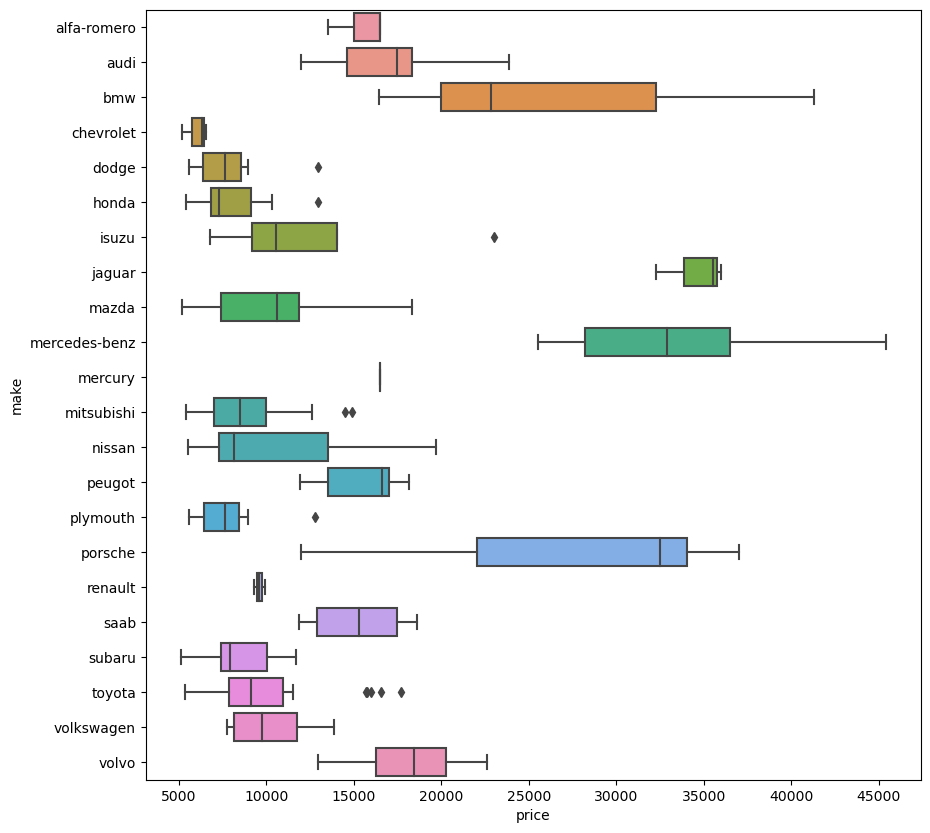

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="price",y="make")
plt.show()

In [24]:
#change the object type data into numerical type then use LabelEncoder class
from sklearn.preprocessing import LabelEncoder

In [25]:
le1=LabelEncoder()
df_cat['make']=le1.fit_transform(df_cat['make'])
le2=LabelEncoder()
df_cat['fuel-type']=le2.fit_transform(df_cat['fuel-type'])
le3=LabelEncoder()
df_cat['body-style']=le3.fit_transform(df_cat['body-style'])
le4=LabelEncoder()
df_cat['drive-wheels']=le4.fit_transform(df_cat['drive-wheels'])
le5=LabelEncoder()
df_cat['engine-location']=le5.fit_transform(df_cat['engine-location'])
le6=LabelEncoder()
df_cat['engine-type']=le6.fit_transform(df_cat['engine-type'])

In [26]:
#concatenation of both dataset df_num and df_cat and hold new dataset df_new
df_new=pd.concat([df_num,df_cat],axis=1) #axis=1 column wise
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [27]:
#select input and output from df_new
X=df_new.drop("price",axis=1) #input
Y=df_new['price'] #output

In [28]:
#train test split
from sklearn.model_selection import train_test_split

#create object of inbuilt class train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [29]:
X_train.shape,X_test.shape

((143, 14), (62, 14))

In [30]:
Y_train.shape,Y_test.shape

((143,), (62,))

In [31]:
#Apply  StandardScaler on input X_train
from sklearn.preprocessing import StandardScaler
#Create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #converts 2D numpy array
#apply scaling on testing input X_test
X_test=ss.transform(X_test) #converts 2D numpy

In [32]:
#create  neural network (ANN : Artificail neural netwrok)
#create  object of sequential class
model=tf.keras.Sequential([tf.keras.layers.Dense(units=15,activation='relu',input_shape=(X.shape[1],)),#first hidedn layer
                          tf.keras.layers.Dense(units=1,activation='linear')]) #output layer is linear bcoz regression problem

In [33]:
#15*14+15=225
#1*15+1=16

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                225       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',loss="mse")

In [36]:
#train the model : fit(X_train,Y_train,no of iteration=)
trained_model=model.fit(X_train,Y_train,epochs=2500)

Epoch 1/2500
5/5 [==============================] - 1s 3ms/step - loss: 244551936.0000
Epoch 2/2500
5/5 [==============================] - 0s 2ms/step - loss: 244549328.0000
Epoch 3/2500
5/5 [==============================] - 0s 2ms/step - loss: 244546832.0000
Epoch 4/2500
5/5 [==============================] - 0s 2ms/step - loss: 244544432.0000
Epoch 5/2500
5/5 [==============================] - 0s 2ms/step - loss: 244541856.0000
Epoch 6/2500
5/5 [==============================] - 0s 3ms/step - loss: 244539312.0000
Epoch 7/2500
5/5 [==============================] - 0s 5ms/step - loss: 244537008.0000
Epoch 8/2500
5/5 [==============================] - 0s 5ms/step - loss: 244534416.0000
Epoch 9/2500
5/5 [==============================] - 0s 4ms/step - loss: 244531968.0000
Epoch 10/2500
5/5 [==============================] - 0s 2ms/step - loss: 244529392.0000
Epoch 11/2500
5/5 [==============================] - 0s 3ms/step - loss: 244526992.0000
Epoch 12/2500
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 244072048.0000
Epoch 95/2500
5/5 [==============================] - 0s 2ms/step - loss: 244060592.0000
Epoch 96/2500
5/5 [==============================] - 0s 2ms/step - loss: 244050128.0000
Epoch 97/2500
5/5 [==============================] - 0s 2ms/step - loss: 244038768.0000
Epoch 98/2500
5/5 [==============================] - 0s 2ms/step - loss: 244026992.0000
Epoch 99/2500
5/5 [==============================] - 0s 2ms/step - loss: 244016544.0000
Epoch 100/2500
5/5 [==============================] - 0s 2ms/step - loss: 244004336.0000
Epoch 101/2500
5/5 [==============================] - 0s 2ms/step - loss: 243993248.0000
Epoch 102/2500
5/5 [==============================] - 0s 2ms/step - loss: 243980448.0000
Epoch 103/2500
5/5 [==============================] - 0s 2ms/step - loss: 243969536.0000
Epoch 104/2500
5/5 [==============================] - 0s 2ms/step - loss: 243957328.0000
Epoch 105/2500
5/5 [=====================

5/5 [==============================] - 0s 2ms/step - loss: 242478096.0000
Epoch 187/2500
5/5 [==============================] - 0s 2ms/step - loss: 242453232.0000
Epoch 188/2500
5/5 [==============================] - 0s 2ms/step - loss: 242429488.0000
Epoch 189/2500
5/5 [==============================] - 0s 2ms/step - loss: 242406288.0000
Epoch 190/2500
5/5 [==============================] - 0s 2ms/step - loss: 242379856.0000
Epoch 191/2500
5/5 [==============================] - 0s 2ms/step - loss: 242356112.0000
Epoch 192/2500
5/5 [==============================] - 0s 2ms/step - loss: 242331904.0000
Epoch 193/2500
5/5 [==============================] - 0s 2ms/step - loss: 242305552.0000
Epoch 194/2500
5/5 [==============================] - 0s 2ms/step - loss: 242281088.0000
Epoch 195/2500
5/5 [==============================] - 0s 2ms/step - loss: 242257552.0000
Epoch 196/2500
5/5 [==============================] - 0s 2ms/step - loss: 242231776.0000
Epoch 197/2500
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 239762448.0000
Epoch 279/2500
5/5 [==============================] - 0s 2ms/step - loss: 239727376.0000
Epoch 280/2500
5/5 [==============================] - 0s 2ms/step - loss: 239691936.0000
Epoch 281/2500
5/5 [==============================] - 0s 1ms/step - loss: 239658496.0000
Epoch 282/2500
5/5 [==============================] - 0s 2ms/step - loss: 239623376.0000
Epoch 283/2500
5/5 [==============================] - 0s 1ms/step - loss: 239587232.0000
Epoch 284/2500
5/5 [==============================] - 0s 2ms/step - loss: 239551520.0000
Epoch 285/2500
5/5 [==============================] - 0s 2ms/step - loss: 239515856.0000
Epoch 286/2500
5/5 [==============================] - 0s 1ms/step - loss: 239482400.0000
Epoch 287/2500
5/5 [==============================] - 0s 2ms/step - loss: 239442528.0000
Epoch 288/2500
5/5 [==============================] - 0s 1ms/step - loss: 239408944.0000
Epoch 289/2500
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 236182912.0000
Epoch 371/2500
5/5 [==============================] - 0s 2ms/step - loss: 236141440.0000
Epoch 372/2500
5/5 [==============================] - 0s 2ms/step - loss: 236095152.0000
Epoch 373/2500
5/5 [==============================] - 0s 2ms/step - loss: 236054560.0000
Epoch 374/2500
5/5 [==============================] - 0s 2ms/step - loss: 236013200.0000
Epoch 375/2500
5/5 [==============================] - 0s 2ms/step - loss: 235968560.0000
Epoch 376/2500
5/5 [==============================] - 0s 2ms/step - loss: 235926544.0000
Epoch 377/2500
5/5 [==============================] - 0s 2ms/step - loss: 235880976.0000
Epoch 378/2500
5/5 [==============================] - 0s 2ms/step - loss: 235841600.0000
Epoch 379/2500
5/5 [==============================] - 0s 2ms/step - loss: 235798448.0000
Epoch 380/2500
5/5 [==============================] - 0s 2ms/step - loss: 235752496.0000
Epoch 381/2500
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 231923712.0000
Epoch 463/2500
5/5 [==============================] - 0s 3ms/step - loss: 231872784.0000
Epoch 464/2500
5/5 [==============================] - 0s 3ms/step - loss: 231822672.0000
Epoch 465/2500
5/5 [==============================] - 0s 2ms/step - loss: 231768832.0000
Epoch 466/2500
5/5 [==============================] - 0s 2ms/step - loss: 231721888.0000
Epoch 467/2500
5/5 [==============================] - 0s 3ms/step - loss: 231672416.0000
Epoch 468/2500
5/5 [==============================] - 0s 2ms/step - loss: 231621280.0000
Epoch 469/2500
5/5 [==============================] - 0s 2ms/step - loss: 231573888.0000
Epoch 470/2500
5/5 [==============================] - 0s 2ms/step - loss: 231527168.0000
Epoch 471/2500
5/5 [==============================] - 0s 3ms/step - loss: 231472688.0000
Epoch 472/2500
5/5 [==============================] - 0s 2ms/step - loss: 231419568.0000
Epoch 473/2500
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 227080720.0000
Epoch 555/2500
5/5 [==============================] - 0s 3ms/step - loss: 227026048.0000
Epoch 556/2500
5/5 [==============================] - 0s 2ms/step - loss: 226971440.0000
Epoch 557/2500
5/5 [==============================] - 0s 2ms/step - loss: 226916528.0000
Epoch 558/2500
5/5 [==============================] - 0s 3ms/step - loss: 226862528.0000
Epoch 559/2500
5/5 [==============================] - 0s 3ms/step - loss: 226809168.0000
Epoch 560/2500
5/5 [==============================] - 0s 2ms/step - loss: 226751664.0000
Epoch 561/2500
5/5 [==============================] - 0s 2ms/step - loss: 226696736.0000
Epoch 562/2500
5/5 [==============================] - 0s 3ms/step - loss: 226643088.0000
Epoch 563/2500
5/5 [==============================] - 0s 2ms/step - loss: 226586128.0000
Epoch 564/2500
5/5 [==============================] - 0s 2ms/step - loss: 226531136.0000
Epoch 565/2500
5/5 [================

5/5 [==============================] - 0s 3ms/step - loss: 221679712.0000
Epoch 647/2500
5/5 [==============================] - 0s 2ms/step - loss: 221615488.0000
Epoch 648/2500
5/5 [==============================] - 0s 2ms/step - loss: 221554800.0000
Epoch 649/2500
5/5 [==============================] - 0s 2ms/step - loss: 221495232.0000
Epoch 650/2500
5/5 [==============================] - 0s 2ms/step - loss: 221430928.0000
Epoch 651/2500
5/5 [==============================] - 0s 2ms/step - loss: 221372176.0000
Epoch 652/2500
5/5 [==============================] - 0s 2ms/step - loss: 221305392.0000
Epoch 653/2500
5/5 [==============================] - 0s 2ms/step - loss: 221246496.0000
Epoch 654/2500
5/5 [==============================] - 0s 2ms/step - loss: 221186000.0000
Epoch 655/2500
5/5 [==============================] - 0s 2ms/step - loss: 221122224.0000
Epoch 656/2500
5/5 [==============================] - 0s 2ms/step - loss: 221064464.0000
Epoch 657/2500
5/5 [================

5/5 [==============================] - 0s 4ms/step - loss: 215831152.0000
Epoch 739/2500
5/5 [==============================] - 0s 4ms/step - loss: 215765744.0000
Epoch 740/2500
5/5 [==============================] - 0s 4ms/step - loss: 215698592.0000
Epoch 741/2500
5/5 [==============================] - 0s 3ms/step - loss: 215635728.0000
Epoch 742/2500
5/5 [==============================] - 0s 3ms/step - loss: 215567120.0000
Epoch 743/2500
5/5 [==============================] - 0s 4ms/step - loss: 215504512.0000
Epoch 744/2500
5/5 [==============================] - 0s 4ms/step - loss: 215440352.0000
Epoch 745/2500
5/5 [==============================] - 0s 4ms/step - loss: 215370224.0000
Epoch 746/2500
5/5 [==============================] - 0s 2ms/step - loss: 215307120.0000
Epoch 747/2500
5/5 [==============================] - 0s 4ms/step - loss: 215242448.0000
Epoch 748/2500
5/5 [==============================] - 0s 2ms/step - loss: 215168496.0000
Epoch 749/2500
5/5 [================

5/5 [==============================] - 0s 4ms/step - loss: 209646960.0000
Epoch 831/2500
5/5 [==============================] - 0s 4ms/step - loss: 209576816.0000
Epoch 832/2500
5/5 [==============================] - 0s 5ms/step - loss: 209508720.0000
Epoch 833/2500
5/5 [==============================] - 0s 4ms/step - loss: 209448704.0000
Epoch 834/2500
5/5 [==============================] - 0s 5ms/step - loss: 209372160.0000
Epoch 835/2500
5/5 [==============================] - 0s 4ms/step - loss: 209303744.0000
Epoch 836/2500
5/5 [==============================] - 0s 4ms/step - loss: 209235536.0000
Epoch 837/2500
5/5 [==============================] - 0s 3ms/step - loss: 209166400.0000
Epoch 838/2500
5/5 [==============================] - 0s 4ms/step - loss: 209090704.0000
Epoch 839/2500
5/5 [==============================] - 0s 4ms/step - loss: 209022768.0000
Epoch 840/2500
5/5 [==============================] - 0s 4ms/step - loss: 208947808.0000
Epoch 841/2500
5/5 [================

5/5 [==============================] - 0s 4ms/step - loss: 203078016.0000
Epoch 923/2500
5/5 [==============================] - 0s 5ms/step - loss: 203009760.0000
Epoch 924/2500
5/5 [==============================] - 0s 2ms/step - loss: 202932480.0000
Epoch 925/2500
5/5 [==============================] - 0s 3ms/step - loss: 202866432.0000
Epoch 926/2500
5/5 [==============================] - 0s 2ms/step - loss: 202786384.0000
Epoch 927/2500
5/5 [==============================] - 0s 3ms/step - loss: 202710752.0000
Epoch 928/2500
5/5 [==============================] - 0s 4ms/step - loss: 202643056.0000
Epoch 929/2500
5/5 [==============================] - 0s 3ms/step - loss: 202571024.0000
Epoch 930/2500
5/5 [==============================] - 0s 3ms/step - loss: 202496688.0000
Epoch 931/2500
5/5 [==============================] - 0s 2ms/step - loss: 202417872.0000
Epoch 932/2500
5/5 [==============================] - 0s 3ms/step - loss: 202349760.0000
Epoch 933/2500
5/5 [================

5/5 [==============================] - 0s 3ms/step - loss: 196227440.0000
Epoch 1015/2500
5/5 [==============================] - 0s 5ms/step - loss: 196153296.0000
Epoch 1016/2500
5/5 [==============================] - 0s 4ms/step - loss: 196080784.0000
Epoch 1017/2500
5/5 [==============================] - 0s 4ms/step - loss: 196002416.0000
Epoch 1018/2500
5/5 [==============================] - 0s 5ms/step - loss: 195930496.0000
Epoch 1019/2500
5/5 [==============================] - 0s 3ms/step - loss: 195846976.0000
Epoch 1020/2500
5/5 [==============================] - 0s 3ms/step - loss: 195777632.0000
Epoch 1021/2500
5/5 [==============================] - 0s 3ms/step - loss: 195702992.0000
Epoch 1022/2500
5/5 [==============================] - 0s 2ms/step - loss: 195623232.0000
Epoch 1023/2500
5/5 [==============================] - 0s 3ms/step - loss: 195550176.0000
Epoch 1024/2500
5/5 [==============================] - 0s 3ms/step - loss: 195470592.0000
Epoch 1025/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 189207520.0000
Epoch 1106/2500
5/5 [==============================] - 0s 3ms/step - loss: 189121392.0000
Epoch 1107/2500
5/5 [==============================] - 0s 2ms/step - loss: 189048240.0000
Epoch 1108/2500
5/5 [==============================] - 0s 5ms/step - loss: 188966432.0000
Epoch 1109/2500
5/5 [==============================] - 0s 5ms/step - loss: 188891040.0000
Epoch 1110/2500
5/5 [==============================] - 0s 4ms/step - loss: 188810736.0000
Epoch 1111/2500
5/5 [==============================] - 0s 6ms/step - loss: 188725200.0000
Epoch 1112/2500
5/5 [==============================] - 0s 4ms/step - loss: 188648144.0000
Epoch 1113/2500
5/5 [==============================] - 0s 5ms/step - loss: 188566800.0000
Epoch 1114/2500
5/5 [==============================] - 0s 2ms/step - loss: 188496688.0000
Epoch 1115/2500
5/5 [==============================] - 0s 4ms/step - loss: 188405248.0000
Epoch 1116/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 181934256.0000
Epoch 1197/2500
5/5 [==============================] - 0s 3ms/step - loss: 181855728.0000
Epoch 1198/2500
5/5 [==============================] - 0s 2ms/step - loss: 181773488.0000
Epoch 1199/2500
5/5 [==============================] - 0s 2ms/step - loss: 181694752.0000
Epoch 1200/2500
5/5 [==============================] - 0s 2ms/step - loss: 181611424.0000
Epoch 1201/2500
5/5 [==============================] - 0s 1ms/step - loss: 181530320.0000
Epoch 1202/2500
5/5 [==============================] - 0s 1ms/step - loss: 181454976.0000
Epoch 1203/2500
5/5 [==============================] - 0s 2ms/step - loss: 181370032.0000
Epoch 1204/2500
5/5 [==============================] - 0s 2ms/step - loss: 181290816.0000
Epoch 1205/2500
5/5 [==============================] - 0s 2ms/step - loss: 181213808.0000
Epoch 1206/2500
5/5 [==============================] - 0s 2ms/step - loss: 181131856.0000
Epoch 1207/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 174482608.0000
Epoch 1288/2500
5/5 [==============================] - 0s 2ms/step - loss: 174404912.0000
Epoch 1289/2500
5/5 [==============================] - 0s 2ms/step - loss: 174318320.0000
Epoch 1290/2500
5/5 [==============================] - 0s 2ms/step - loss: 174230416.0000
Epoch 1291/2500
5/5 [==============================] - 0s 2ms/step - loss: 174149408.0000
Epoch 1292/2500
5/5 [==============================] - 0s 2ms/step - loss: 174057344.0000
Epoch 1293/2500
5/5 [==============================] - 0s 3ms/step - loss: 173980208.0000
Epoch 1294/2500
5/5 [==============================] - 0s 2ms/step - loss: 173891040.0000
Epoch 1295/2500
5/5 [==============================] - 0s 2ms/step - loss: 173809600.0000
Epoch 1296/2500
5/5 [==============================] - 0s 2ms/step - loss: 173728688.0000
Epoch 1297/2500
5/5 [==============================] - 0s 2ms/step - loss: 173648944.0000
Epoch 1298/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 166876992.0000
Epoch 1379/2500
5/5 [==============================] - 0s 2ms/step - loss: 166786112.0000
Epoch 1380/2500
5/5 [==============================] - 0s 2ms/step - loss: 166705248.0000
Epoch 1381/2500
5/5 [==============================] - 0s 2ms/step - loss: 166619088.0000
Epoch 1382/2500
5/5 [==============================] - 0s 2ms/step - loss: 166529200.0000
Epoch 1383/2500
5/5 [==============================] - 0s 2ms/step - loss: 166445632.0000
Epoch 1384/2500
5/5 [==============================] - 0s 2ms/step - loss: 166366192.0000
Epoch 1385/2500
5/5 [==============================] - 0s 2ms/step - loss: 166275216.0000
Epoch 1386/2500
5/5 [==============================] - 0s 2ms/step - loss: 166194624.0000
Epoch 1387/2500
5/5 [==============================] - 0s 2ms/step - loss: 166106592.0000
Epoch 1388/2500
5/5 [==============================] - 0s 2ms/step - loss: 166022640.0000
Epoch 1389/2500
5/5 [=====

5/5 [==============================] - 0s 1ms/step - loss: 159193936.0000
Epoch 1470/2500
5/5 [==============================] - 0s 2ms/step - loss: 159107744.0000
Epoch 1471/2500
5/5 [==============================] - 0s 2ms/step - loss: 159027840.0000
Epoch 1472/2500
5/5 [==============================] - 0s 2ms/step - loss: 158937856.0000
Epoch 1473/2500
5/5 [==============================] - 0s 2ms/step - loss: 158853520.0000
Epoch 1474/2500
5/5 [==============================] - 0s 2ms/step - loss: 158772912.0000
Epoch 1475/2500
5/5 [==============================] - 0s 2ms/step - loss: 158692352.0000
Epoch 1476/2500
5/5 [==============================] - 0s 2ms/step - loss: 158603424.0000
Epoch 1477/2500
5/5 [==============================] - 0s 2ms/step - loss: 158521488.0000
Epoch 1478/2500
5/5 [==============================] - 0s 2ms/step - loss: 158436928.0000
Epoch 1479/2500
5/5 [==============================] - 0s 2ms/step - loss: 158349344.0000
Epoch 1480/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 151356272.0000
Epoch 1561/2500
5/5 [==============================] - 0s 2ms/step - loss: 151273584.0000
Epoch 1562/2500
5/5 [==============================] - 0s 2ms/step - loss: 151190768.0000
Epoch 1563/2500
5/5 [==============================] - 0s 2ms/step - loss: 151102128.0000
Epoch 1564/2500
5/5 [==============================] - 0s 2ms/step - loss: 151016864.0000
Epoch 1565/2500
5/5 [==============================] - 0s 2ms/step - loss: 150931952.0000
Epoch 1566/2500
5/5 [==============================] - 0s 2ms/step - loss: 150835376.0000
Epoch 1567/2500
5/5 [==============================] - 0s 2ms/step - loss: 150754160.0000
Epoch 1568/2500
5/5 [==============================] - 0s 2ms/step - loss: 150663968.0000
Epoch 1569/2500
5/5 [==============================] - 0s 2ms/step - loss: 150574704.0000
Epoch 1570/2500
5/5 [==============================] - 0s 2ms/step - loss: 150495040.0000
Epoch 1571/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 143508704.0000
Epoch 1652/2500
5/5 [==============================] - 0s 2ms/step - loss: 143429104.0000
Epoch 1653/2500
5/5 [==============================] - 0s 2ms/step - loss: 143339104.0000
Epoch 1654/2500
5/5 [==============================] - 0s 2ms/step - loss: 143252560.0000
Epoch 1655/2500
5/5 [==============================] - 0s 2ms/step - loss: 143173440.0000
Epoch 1656/2500
5/5 [==============================] - 0s 2ms/step - loss: 143080880.0000
Epoch 1657/2500
5/5 [==============================] - 0s 2ms/step - loss: 143000336.0000
Epoch 1658/2500
5/5 [==============================] - 0s 2ms/step - loss: 142910400.0000
Epoch 1659/2500
5/5 [==============================] - 0s 1ms/step - loss: 142829264.0000
Epoch 1660/2500
5/5 [==============================] - 0s 2ms/step - loss: 142744048.0000
Epoch 1661/2500
5/5 [==============================] - 0s 2ms/step - loss: 142657632.0000
Epoch 1662/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 135738512.0000
Epoch 1743/2500
5/5 [==============================] - 0s 2ms/step - loss: 135644528.0000
Epoch 1744/2500
5/5 [==============================] - 0s 2ms/step - loss: 135560480.0000
Epoch 1745/2500
5/5 [==============================] - 0s 2ms/step - loss: 135476256.0000
Epoch 1746/2500
5/5 [==============================] - 0s 2ms/step - loss: 135384208.0000
Epoch 1747/2500
5/5 [==============================] - 0s 2ms/step - loss: 135304816.0000
Epoch 1748/2500
5/5 [==============================] - 0s 2ms/step - loss: 135212720.0000
Epoch 1749/2500
5/5 [==============================] - 0s 2ms/step - loss: 135125296.0000
Epoch 1750/2500
5/5 [==============================] - 0s 2ms/step - loss: 135041104.0000
Epoch 1751/2500
5/5 [==============================] - 0s 2ms/step - loss: 134956592.0000
Epoch 1752/2500
5/5 [==============================] - 0s 2ms/step - loss: 134862960.0000
Epoch 1753/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 127954240.0000
Epoch 1834/2500
5/5 [==============================] - 0s 2ms/step - loss: 127867440.0000
Epoch 1835/2500
5/5 [==============================] - 0s 2ms/step - loss: 127787856.0000
Epoch 1836/2500
5/5 [==============================] - 0s 2ms/step - loss: 127707608.0000
Epoch 1837/2500
5/5 [==============================] - 0s 2ms/step - loss: 127617696.0000
Epoch 1838/2500
5/5 [==============================] - 0s 2ms/step - loss: 127532552.0000
Epoch 1839/2500
5/5 [==============================] - 0s 2ms/step - loss: 127450280.0000
Epoch 1840/2500
5/5 [==============================] - 0s 2ms/step - loss: 127366792.0000
Epoch 1841/2500
5/5 [==============================] - 0s 2ms/step - loss: 127282584.0000
Epoch 1842/2500
5/5 [==============================] - 0s 2ms/step - loss: 127193216.0000
Epoch 1843/2500
5/5 [==============================] - 0s 2ms/step - loss: 127112456.0000
Epoch 1844/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 120287760.0000
Epoch 1925/2500
5/5 [==============================] - 0s 2ms/step - loss: 120206760.0000
Epoch 1926/2500
5/5 [==============================] - 0s 2ms/step - loss: 120124112.0000
Epoch 1927/2500
5/5 [==============================] - 0s 2ms/step - loss: 120040200.0000
Epoch 1928/2500
5/5 [==============================] - 0s 2ms/step - loss: 119957784.0000
Epoch 1929/2500
5/5 [==============================] - 0s 1ms/step - loss: 119869944.0000
Epoch 1930/2500
5/5 [==============================] - 0s 2ms/step - loss: 119784728.0000
Epoch 1931/2500
5/5 [==============================] - 0s 2ms/step - loss: 119702536.0000
Epoch 1932/2500
5/5 [==============================] - 0s 2ms/step - loss: 119617432.0000
Epoch 1933/2500
5/5 [==============================] - 0s 2ms/step - loss: 119536312.0000
Epoch 1934/2500
5/5 [==============================] - 0s 2ms/step - loss: 119456704.0000
Epoch 1935/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 112755072.0000
Epoch 2016/2500
5/5 [==============================] - 0s 3ms/step - loss: 112677976.0000
Epoch 2017/2500
5/5 [==============================] - 0s 2ms/step - loss: 112591880.0000
Epoch 2018/2500
5/5 [==============================] - 0s 2ms/step - loss: 112505024.0000
Epoch 2019/2500
5/5 [==============================] - 0s 2ms/step - loss: 112428872.0000
Epoch 2020/2500
5/5 [==============================] - 0s 2ms/step - loss: 112342624.0000
Epoch 2021/2500
5/5 [==============================] - 0s 2ms/step - loss: 112256920.0000
Epoch 2022/2500
5/5 [==============================] - 0s 2ms/step - loss: 112175896.0000
Epoch 2023/2500
5/5 [==============================] - 0s 2ms/step - loss: 112095504.0000
Epoch 2024/2500
5/5 [==============================] - 0s 2ms/step - loss: 112012008.0000
Epoch 2025/2500
5/5 [==============================] - 0s 2ms/step - loss: 111926824.0000
Epoch 2026/2500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 105336680.0000
Epoch 2107/2500
5/5 [==============================] - 0s 3ms/step - loss: 105256600.0000
Epoch 2108/2500
5/5 [==============================] - 0s 2ms/step - loss: 105176256.0000
Epoch 2109/2500
5/5 [==============================] - 0s 2ms/step - loss: 105094488.0000
Epoch 2110/2500
5/5 [==============================] - 0s 4ms/step - loss: 105012880.0000
Epoch 2111/2500
5/5 [==============================] - 0s 3ms/step - loss: 104932848.0000
Epoch 2112/2500
5/5 [==============================] - 0s 2ms/step - loss: 104850040.0000
Epoch 2113/2500
5/5 [==============================] - 0s 2ms/step - loss: 104773528.0000
Epoch 2114/2500
5/5 [==============================] - 0s 3ms/step - loss: 104689224.0000
Epoch 2115/2500
5/5 [==============================] - 0s 3ms/step - loss: 104612600.0000
Epoch 2116/2500
5/5 [==============================] - 0s 2ms/step - loss: 104531728.0000
Epoch 2117/2500
5/5 [=====

5/5 [==============================] - 0s 5ms/step - loss: 98103800.0000
Epoch 2198/2500
5/5 [==============================] - 0s 2ms/step - loss: 98028048.0000
Epoch 2199/2500
5/5 [==============================] - 0s 3ms/step - loss: 97952264.0000
Epoch 2200/2500
5/5 [==============================] - 0s 3ms/step - loss: 97869712.0000
Epoch 2201/2500
5/5 [==============================] - 0s 2ms/step - loss: 97788824.0000
Epoch 2202/2500
5/5 [==============================] - 0s 2ms/step - loss: 97709128.0000
Epoch 2203/2500
5/5 [==============================] - 0s 2ms/step - loss: 97636664.0000
Epoch 2204/2500
5/5 [==============================] - 0s 2ms/step - loss: 97556352.0000
Epoch 2205/2500
5/5 [==============================] - 0s 3ms/step - loss: 97473504.0000
Epoch 2206/2500
5/5 [==============================] - 0s 3ms/step - loss: 97394208.0000
Epoch 2207/2500
5/5 [==============================] - 0s 3ms/step - loss: 97319824.0000
Epoch 2208/2500
5/5 [================

5/5 [==============================] - 0s 4ms/step - loss: 90988032.0000
Epoch 2290/2500
5/5 [==============================] - 0s 4ms/step - loss: 90910448.0000
Epoch 2291/2500
5/5 [==============================] - 0s 4ms/step - loss: 90842496.0000
Epoch 2292/2500
5/5 [==============================] - 0s 3ms/step - loss: 90755448.0000
Epoch 2293/2500
5/5 [==============================] - 0s 2ms/step - loss: 90686888.0000
Epoch 2294/2500
5/5 [==============================] - 0s 2ms/step - loss: 90605720.0000
Epoch 2295/2500
5/5 [==============================] - 0s 2ms/step - loss: 90535808.0000
Epoch 2296/2500
5/5 [==============================] - 0s 2ms/step - loss: 90457816.0000
Epoch 2297/2500
5/5 [==============================] - 0s 2ms/step - loss: 90379992.0000
Epoch 2298/2500
5/5 [==============================] - 0s 2ms/step - loss: 90306768.0000
Epoch 2299/2500
5/5 [==============================] - 0s 4ms/step - loss: 90240192.0000
Epoch 2300/2500
5/5 [================

5/5 [==============================] - 0s 3ms/step - loss: 84151216.0000
Epoch 2382/2500
5/5 [==============================] - 0s 4ms/step - loss: 84082784.0000
Epoch 2383/2500
5/5 [==============================] - 0s 5ms/step - loss: 84005256.0000
Epoch 2384/2500
5/5 [==============================] - 0s 4ms/step - loss: 83939192.0000
Epoch 2385/2500
5/5 [==============================] - 0s 5ms/step - loss: 83862432.0000
Epoch 2386/2500
5/5 [==============================] - 0s 3ms/step - loss: 83791216.0000
Epoch 2387/2500
5/5 [==============================] - 0s 2ms/step - loss: 83718088.0000
Epoch 2388/2500
5/5 [==============================] - 0s 3ms/step - loss: 83650424.0000
Epoch 2389/2500
5/5 [==============================] - 0s 3ms/step - loss: 83575248.0000
Epoch 2390/2500
5/5 [==============================] - 0s 4ms/step - loss: 83505216.0000
Epoch 2391/2500
5/5 [==============================] - 0s 3ms/step - loss: 83432760.0000
Epoch 2392/2500
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 77662368.0000
Epoch 2474/2500
5/5 [==============================] - 0s 2ms/step - loss: 77591400.0000
Epoch 2475/2500
5/5 [==============================] - 0s 2ms/step - loss: 77528440.0000
Epoch 2476/2500
5/5 [==============================] - 0s 2ms/step - loss: 77460096.0000
Epoch 2477/2500
5/5 [==============================] - 0s 2ms/step - loss: 77392944.0000
Epoch 2478/2500
5/5 [==============================] - 0s 2ms/step - loss: 77324024.0000
Epoch 2479/2500
5/5 [==============================] - 0s 2ms/step - loss: 77258648.0000
Epoch 2480/2500
5/5 [==============================] - 0s 1ms/step - loss: 77185496.0000
Epoch 2481/2500
5/5 [==============================] - 0s 2ms/step - loss: 77122576.0000
Epoch 2482/2500
5/5 [==============================] - 0s 2ms/step - loss: 77053232.0000
Epoch 2483/2500
5/5 [==============================] - 0s 2ms/step - loss: 76985552.0000
Epoch 2484/2500
5/5 [================

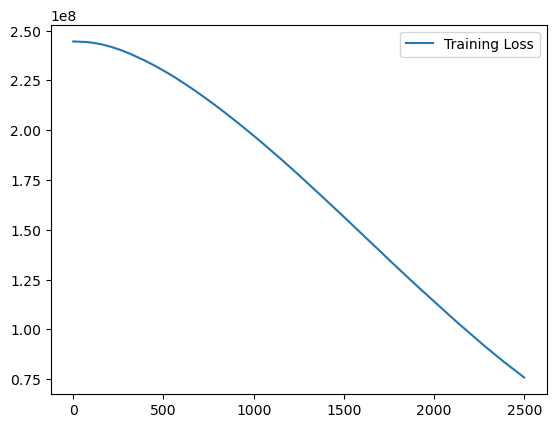

In [37]:
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.legend()
plt.show()

In [38]:
#training error
model.evaluate(X_train,Y_train)

5/5 [==============================] - 0s 2ms/step - loss: 75768072.0000


75768072.0

In [39]:
#testing error
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 72564816.0000


72564816.0

In [40]:
#Early stopping : - it is decided no of epochs.
#create procedure for early stopping : why to decide number of epoch
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
#create object of early stopping
es=EarlyStopping(monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [42]:
#train the model
trained_model1=model.fit(X_train,Y_train,epochs=10000,validation_data=(X_test,Y_test),callbacks=es)

Epoch 1/10000
5/5 [==============================] - 0s 18ms/step - loss: 75743592.0000 - val_loss: 72504744.0000
Epoch 2/10000
5/5 [==============================] - 0s 9ms/step - loss: 75680664.0000 - val_loss: 72441600.0000
Epoch 3/10000
5/5 [==============================] - 0s 8ms/step - loss: 75612328.0000 - val_loss: 72379560.0000
Epoch 4/10000
5/5 [==============================] - 0s 8ms/step - loss: 75543248.0000 - val_loss: 72318960.0000
Epoch 5/10000
5/5 [==============================] - 0s 10ms/step - loss: 75477808.0000 - val_loss: 72256760.0000
Epoch 6/10000
5/5 [==============================] - 0s 12ms/step - loss: 75409248.0000 - val_loss: 72193720.0000
Epoch 7/10000
5/5 [==============================] - 0s 10ms/step - loss: 75338848.0000 - val_loss: 72130016.0000
Epoch 8/10000
5/5 [==============================] - 0s 9ms/step - loss: 75273928.0000 - val_loss: 72065648.0000
Epoch 9/10000
5/5 [==============================] - 0s 8ms/step - loss: 75207080.0000 - val

Epoch 73/10000
5/5 [==============================] - 0s 8ms/step - loss: 70955824.0000 - val_loss: 68075680.0000
Epoch 74/10000
5/5 [==============================] - 0s 9ms/step - loss: 70890752.0000 - val_loss: 68015264.0000
Epoch 75/10000
5/5 [==============================] - 0s 8ms/step - loss: 70829496.0000 - val_loss: 67953656.0000
Epoch 76/10000
5/5 [==============================] - 0s 9ms/step - loss: 70759592.0000 - val_loss: 67894024.0000
Epoch 77/10000
5/5 [==============================] - 0s 7ms/step - loss: 70696792.0000 - val_loss: 67833432.0000
Epoch 78/10000
5/5 [==============================] - 0s 8ms/step - loss: 70633496.0000 - val_loss: 67773336.0000
Epoch 79/10000
5/5 [==============================] - 0s 9ms/step - loss: 70564936.0000 - val_loss: 67715048.0000
Epoch 80/10000
5/5 [==============================] - 0s 8ms/step - loss: 70500296.0000 - val_loss: 67654728.0000
Epoch 81/10000
5/5 [==============================] - 0s 8ms/step - loss: 70436288.0000 

5/5 [==============================] - 0s 13ms/step - loss: 66470524.0000 - val_loss: 63899508.0000
Epoch 145/10000
5/5 [==============================] - 0s 15ms/step - loss: 66408500.0000 - val_loss: 63843344.0000
Epoch 146/10000
5/5 [==============================] - 0s 11ms/step - loss: 66349356.0000 - val_loss: 63787336.0000
Epoch 147/10000
5/5 [==============================] - 0s 8ms/step - loss: 66290432.0000 - val_loss: 63731612.0000
Epoch 148/10000
5/5 [==============================] - 0s 9ms/step - loss: 66230944.0000 - val_loss: 63675436.0000
Epoch 149/10000
5/5 [==============================] - 0s 9ms/step - loss: 66169004.0000 - val_loss: 63620408.0000
Epoch 150/10000
5/5 [==============================] - 0s 9ms/step - loss: 66107112.0000 - val_loss: 63564592.0000
Epoch 151/10000
5/5 [==============================] - 0s 17ms/step - loss: 66050720.0000 - val_loss: 63506556.0000
Epoch 152/10000
5/5 [==============================] - 0s 12ms/step - loss: 65985472.0000 - 

5/5 [==============================] - 0s 9ms/step - loss: 62201360.0000 - val_loss: 59894612.0000
Epoch 216/10000
5/5 [==============================] - 0s 9ms/step - loss: 62141576.0000 - val_loss: 59841380.0000
Epoch 217/10000
5/5 [==============================] - 0s 14ms/step - loss: 62084476.0000 - val_loss: 59788196.0000
Epoch 218/10000
5/5 [==============================] - 0s 13ms/step - loss: 62028820.0000 - val_loss: 59734512.0000
Epoch 219/10000
5/5 [==============================] - 0s 14ms/step - loss: 61972100.0000 - val_loss: 59680940.0000
Epoch 220/10000
5/5 [==============================] - 0s 12ms/step - loss: 61912672.0000 - val_loss: 59628520.0000
Epoch 221/10000
5/5 [==============================] - 0s 19ms/step - loss: 61857404.0000 - val_loss: 59574188.0000
Epoch 222/10000
5/5 [==============================] - 0s 15ms/step - loss: 61800348.0000 - val_loss: 59518268.0000
Epoch 223/10000
5/5 [==============================] - 0s 11ms/step - loss: 61738764.0000 

5/5 [==============================] - 0s 8ms/step - loss: 58239688.0000 - val_loss: 56149556.0000
Epoch 287/10000
5/5 [==============================] - 0s 10ms/step - loss: 58189128.0000 - val_loss: 56096472.0000
Epoch 288/10000
5/5 [==============================] - 0s 9ms/step - loss: 58133924.0000 - val_loss: 56045276.0000
Epoch 289/10000
5/5 [==============================] - 0s 8ms/step - loss: 58078156.0000 - val_loss: 55995640.0000
Epoch 290/10000
5/5 [==============================] - 0s 9ms/step - loss: 58026380.0000 - val_loss: 55943768.0000
Epoch 291/10000
5/5 [==============================] - 0s 9ms/step - loss: 57971028.0000 - val_loss: 55891844.0000
Epoch 292/10000
5/5 [==============================] - 0s 8ms/step - loss: 57915588.0000 - val_loss: 55840932.0000
Epoch 293/10000
5/5 [==============================] - 0s 11ms/step - loss: 57862100.0000 - val_loss: 55788088.0000
Epoch 294/10000
5/5 [==============================] - 0s 9ms/step - loss: 57810344.0000 - val

5/5 [==============================] - 0s 8ms/step - loss: 54473452.0000 - val_loss: 52552068.0000
Epoch 358/10000
5/5 [==============================] - 0s 8ms/step - loss: 54422136.0000 - val_loss: 52501880.0000
Epoch 359/10000
5/5 [==============================] - 0s 9ms/step - loss: 54369060.0000 - val_loss: 52453416.0000
Epoch 360/10000
5/5 [==============================] - 0s 9ms/step - loss: 54315624.0000 - val_loss: 52405472.0000
Epoch 361/10000
5/5 [==============================] - 0s 13ms/step - loss: 54267868.0000 - val_loss: 52356028.0000
Epoch 362/10000
5/5 [==============================] - 0s 10ms/step - loss: 54214676.0000 - val_loss: 52308024.0000
Epoch 363/10000
5/5 [==============================] - 0s 9ms/step - loss: 54165660.0000 - val_loss: 52258092.0000
Epoch 364/10000
5/5 [==============================] - 0s 9ms/step - loss: 54113604.0000 - val_loss: 52208416.0000
Epoch 365/10000
5/5 [==============================] - 0s 8ms/step - loss: 54060728.0000 - val

5/5 [==============================] - 0s 9ms/step - loss: 50953632.0000 - val_loss: 49161048.0000
Epoch 429/10000
5/5 [==============================] - 0s 9ms/step - loss: 50902492.0000 - val_loss: 49115508.0000
Epoch 430/10000
5/5 [==============================] - 0s 9ms/step - loss: 50859948.0000 - val_loss: 49068496.0000
Epoch 431/10000
5/5 [==============================] - 0s 9ms/step - loss: 50809120.0000 - val_loss: 49024264.0000
Epoch 432/10000
5/5 [==============================] - 0s 9ms/step - loss: 50764224.0000 - val_loss: 48979400.0000
Epoch 433/10000
5/5 [==============================] - 0s 8ms/step - loss: 50717512.0000 - val_loss: 48933896.0000
Epoch 434/10000
5/5 [==============================] - 0s 9ms/step - loss: 50671100.0000 - val_loss: 48889196.0000
Epoch 435/10000
5/5 [==============================] - 0s 9ms/step - loss: 50624584.0000 - val_loss: 48844788.0000
Epoch 436/10000
5/5 [==============================] - 0s 10ms/step - loss: 50575736.0000 - val_

5/5 [==============================] - 0s 9ms/step - loss: 47700872.0000 - val_loss: 45996420.0000
Epoch 500/10000
5/5 [==============================] - 0s 9ms/step - loss: 47657124.0000 - val_loss: 45954220.0000
Epoch 501/10000
5/5 [==============================] - 0s 9ms/step - loss: 47612964.0000 - val_loss: 45912684.0000
Epoch 502/10000
5/5 [==============================] - 0s 9ms/step - loss: 47571716.0000 - val_loss: 45869700.0000
Epoch 503/10000
5/5 [==============================] - 0s 10ms/step - loss: 47527860.0000 - val_loss: 45825948.0000
Epoch 504/10000
5/5 [==============================] - 0s 10ms/step - loss: 47485544.0000 - val_loss: 45781796.0000
Epoch 505/10000
5/5 [==============================] - 0s 9ms/step - loss: 47437944.0000 - val_loss: 45739472.0000
Epoch 506/10000
5/5 [==============================] - 0s 8ms/step - loss: 47394220.0000 - val_loss: 45696768.0000
Epoch 507/10000
5/5 [==============================] - 0s 10ms/step - loss: 47349796.0000 - va

5/5 [==============================] - 0s 10ms/step - loss: 44712712.0000 - val_loss: 43060456.0000
Epoch 571/10000
5/5 [==============================] - 0s 10ms/step - loss: 44670876.0000 - val_loss: 43021156.0000
Epoch 572/10000
5/5 [==============================] - 0s 10ms/step - loss: 44631712.0000 - val_loss: 42981164.0000
Epoch 573/10000
5/5 [==============================] - 0s 10ms/step - loss: 44591940.0000 - val_loss: 42940836.0000
Epoch 574/10000
5/5 [==============================] - 0s 9ms/step - loss: 44550292.0000 - val_loss: 42901572.0000
Epoch 575/10000
5/5 [==============================] - 0s 10ms/step - loss: 44513752.0000 - val_loss: 42861300.0000
Epoch 576/10000
5/5 [==============================] - 0s 12ms/step - loss: 44471532.0000 - val_loss: 42823332.0000
Epoch 577/10000
5/5 [==============================] - 0s 17ms/step - loss: 44431276.0000 - val_loss: 42785676.0000
Epoch 578/10000
5/5 [==============================] - 0s 11ms/step - loss: 44392872.0000

5/5 [==============================] - 0s 10ms/step - loss: 41983272.0000 - val_loss: 40345108.0000
Epoch 642/10000
5/5 [==============================] - 0s 10ms/step - loss: 41944156.0000 - val_loss: 40309344.0000
Epoch 643/10000
5/5 [==============================] - 0s 9ms/step - loss: 41909208.0000 - val_loss: 40273188.0000
Epoch 644/10000
5/5 [==============================] - 0s 9ms/step - loss: 41871684.0000 - val_loss: 40238048.0000
Epoch 645/10000
5/5 [==============================] - 0s 9ms/step - loss: 41834412.0000 - val_loss: 40202328.0000
Epoch 646/10000
5/5 [==============================] - 0s 11ms/step - loss: 41799528.0000 - val_loss: 40164716.0000
Epoch 647/10000
5/5 [==============================] - 0s 10ms/step - loss: 41761844.0000 - val_loss: 40128140.0000
Epoch 648/10000
5/5 [==============================] - 0s 10ms/step - loss: 41726160.0000 - val_loss: 40091564.0000
Epoch 649/10000
5/5 [==============================] - 0s 9ms/step - loss: 41689932.0000 - 

5/5 [==============================] - 0s 9ms/step - loss: 39540844.0000 - val_loss: 37895628.0000
Epoch 713/10000
5/5 [==============================] - 0s 9ms/step - loss: 39506732.0000 - val_loss: 37862120.0000
Epoch 714/10000
5/5 [==============================] - 0s 10ms/step - loss: 39474004.0000 - val_loss: 37829376.0000
Epoch 715/10000
5/5 [==============================] - 0s 10ms/step - loss: 39442212.0000 - val_loss: 37797252.0000
Epoch 716/10000
5/5 [==============================] - 0s 8ms/step - loss: 39409304.0000 - val_loss: 37765636.0000
Epoch 717/10000
5/5 [==============================] - 0s 9ms/step - loss: 39378244.0000 - val_loss: 37733444.0000
Epoch 718/10000
5/5 [==============================] - 0s 10ms/step - loss: 39347308.0000 - val_loss: 37700772.0000
Epoch 719/10000
5/5 [==============================] - 0s 10ms/step - loss: 39313780.0000 - val_loss: 37669012.0000
Epoch 720/10000
5/5 [==============================] - 0s 9ms/step - loss: 39280900.0000 - v

5/5 [==============================] - 0s 8ms/step - loss: 37344272.0000 - val_loss: 35674652.0000
Epoch 784/10000
5/5 [==============================] - 0s 8ms/step - loss: 37314428.0000 - val_loss: 35644712.0000
Epoch 785/10000
5/5 [==============================] - 0s 9ms/step - loss: 37286456.0000 - val_loss: 35614440.0000
Epoch 786/10000
5/5 [==============================] - 0s 8ms/step - loss: 37255724.0000 - val_loss: 35585612.0000
Epoch 787/10000
5/5 [==============================] - 0s 8ms/step - loss: 37227648.0000 - val_loss: 35555068.0000
Epoch 788/10000
5/5 [==============================] - 0s 9ms/step - loss: 37196476.0000 - val_loss: 35524472.0000
Epoch 789/10000
5/5 [==============================] - 0s 9ms/step - loss: 37167692.0000 - val_loss: 35493660.0000
Epoch 790/10000
5/5 [==============================] - 0s 9ms/step - loss: 37138520.0000 - val_loss: 35462636.0000
Epoch 791/10000
5/5 [==============================] - 0s 9ms/step - loss: 37105880.0000 - val_l

5/5 [==============================] - 0s 9ms/step - loss: 35366928.0000 - val_loss: 33652124.0000
Epoch 855/10000
5/5 [==============================] - 0s 9ms/step - loss: 35341968.0000 - val_loss: 33624988.0000
Epoch 856/10000
5/5 [==============================] - 0s 8ms/step - loss: 35315080.0000 - val_loss: 33597988.0000
Epoch 857/10000
5/5 [==============================] - 0s 8ms/step - loss: 35287324.0000 - val_loss: 33571128.0000
Epoch 858/10000
5/5 [==============================] - 0s 9ms/step - loss: 35260452.0000 - val_loss: 33544502.0000
Epoch 859/10000
5/5 [==============================] - 0s 8ms/step - loss: 35235044.0000 - val_loss: 33517448.0000
Epoch 860/10000
5/5 [==============================] - 0s 8ms/step - loss: 35208216.0000 - val_loss: 33490066.0000
Epoch 861/10000
5/5 [==============================] - 0s 9ms/step - loss: 35181468.0000 - val_loss: 33463434.0000
Epoch 862/10000
5/5 [==============================] - 0s 8ms/step - loss: 35156140.0000 - val_l

5/5 [==============================] - 0s 9ms/step - loss: 33610788.0000 - val_loss: 31855298.0000
Epoch 926/10000
5/5 [==============================] - 0s 9ms/step - loss: 33589624.0000 - val_loss: 31830842.0000
Epoch 927/10000
5/5 [==============================] - 0s 8ms/step - loss: 33565480.0000 - val_loss: 31807490.0000
Epoch 928/10000
5/5 [==============================] - 0s 9ms/step - loss: 33541550.0000 - val_loss: 31784530.0000
Epoch 929/10000
5/5 [==============================] - 0s 9ms/step - loss: 33518724.0000 - val_loss: 31761374.0000
Epoch 930/10000
5/5 [==============================] - 0s 9ms/step - loss: 33495362.0000 - val_loss: 31738224.0000
Epoch 931/10000
5/5 [==============================] - 0s 9ms/step - loss: 33472540.0000 - val_loss: 31714052.0000
Epoch 932/10000
5/5 [==============================] - 0s 10ms/step - loss: 33449218.0000 - val_loss: 31689286.0000
Epoch 933/10000
5/5 [==============================] - 0s 8ms/step - loss: 33423840.0000 - val_

5/5 [==============================] - 0s 8ms/step - loss: 32030172.0000 - val_loss: 30237850.0000
Epoch 997/10000
5/5 [==============================] - 0s 9ms/step - loss: 32008814.0000 - val_loss: 30217876.0000
Epoch 998/10000
5/5 [==============================] - 0s 8ms/step - loss: 31990616.0000 - val_loss: 30196360.0000
Epoch 999/10000
5/5 [==============================] - 0s 9ms/step - loss: 31968528.0000 - val_loss: 30175650.0000
Epoch 1000/10000
5/5 [==============================] - 0s 8ms/step - loss: 31947650.0000 - val_loss: 30155794.0000
Epoch 1001/10000
5/5 [==============================] - 0s 9ms/step - loss: 31928362.0000 - val_loss: 30134930.0000
Epoch 1002/10000
5/5 [==============================] - 0s 8ms/step - loss: 31906708.0000 - val_loss: 30114928.0000
Epoch 1003/10000
5/5 [==============================] - 0s 8ms/step - loss: 31887522.0000 - val_loss: 30093502.0000
Epoch 1004/10000
5/5 [==============================] - 0s 8ms/step - loss: 31865304.0000 - 

5/5 [==============================] - 0s 9ms/step - loss: 30630966.0000 - val_loss: 28815682.0000
Epoch 1067/10000
5/5 [==============================] - 0s 8ms/step - loss: 30613482.0000 - val_loss: 28795900.0000
Epoch 1068/10000
5/5 [==============================] - 0s 9ms/step - loss: 30594192.0000 - val_loss: 28776596.0000
Epoch 1069/10000
5/5 [==============================] - 0s 8ms/step - loss: 30575502.0000 - val_loss: 28756182.0000
Epoch 1070/10000
5/5 [==============================] - 0s 9ms/step - loss: 30554922.0000 - val_loss: 28736582.0000
Epoch 1071/10000
5/5 [==============================] - 0s 10ms/step - loss: 30535802.0000 - val_loss: 28716780.0000
Epoch 1072/10000
5/5 [==============================] - 0s 8ms/step - loss: 30517660.0000 - val_loss: 28696362.0000
Epoch 1073/10000
5/5 [==============================] - 0s 8ms/step - loss: 30497166.0000 - val_loss: 28677262.0000
Epoch 1074/10000
5/5 [==============================] - 0s 8ms/step - loss: 30477520.000

5/5 [==============================] - 0s 8ms/step - loss: 29365896.0000 - val_loss: 27546844.0000
Epoch 1137/10000
5/5 [==============================] - 0s 9ms/step - loss: 29348856.0000 - val_loss: 27530876.0000
Epoch 1138/10000
5/5 [==============================] - 0s 9ms/step - loss: 29332260.0000 - val_loss: 27514068.0000
Epoch 1139/10000
5/5 [==============================] - 0s 8ms/step - loss: 29315202.0000 - val_loss: 27496686.0000
Epoch 1140/10000
5/5 [==============================] - 0s 8ms/step - loss: 29298432.0000 - val_loss: 27478590.0000
Epoch 1141/10000
5/5 [==============================] - 0s 9ms/step - loss: 29279814.0000 - val_loss: 27460978.0000
Epoch 1142/10000
5/5 [==============================] - 0s 10ms/step - loss: 29261322.0000 - val_loss: 27443220.0000
Epoch 1143/10000
5/5 [==============================] - 0s 9ms/step - loss: 29244924.0000 - val_loss: 27424144.0000
Epoch 1144/10000
5/5 [==============================] - 0s 9ms/step - loss: 29227098.000

Epoch 1207/10000
5/5 [==============================] - 0s 9ms/step - loss: 28193362.0000 - val_loss: 26394216.0000
Epoch 1208/10000
5/5 [==============================] - 0s 9ms/step - loss: 28177982.0000 - val_loss: 26378098.0000
Epoch 1209/10000
5/5 [==============================] - 0s 9ms/step - loss: 28162660.0000 - val_loss: 26361130.0000
Epoch 1210/10000
5/5 [==============================] - 0s 8ms/step - loss: 28145896.0000 - val_loss: 26344944.0000
Epoch 1211/10000
5/5 [==============================] - 0s 9ms/step - loss: 28129118.0000 - val_loss: 26329938.0000
Epoch 1212/10000
5/5 [==============================] - 0s 8ms/step - loss: 28113690.0000 - val_loss: 26314884.0000
Epoch 1213/10000
5/5 [==============================] - 0s 8ms/step - loss: 28097262.0000 - val_loss: 26300084.0000
Epoch 1214/10000
5/5 [==============================] - 0s 8ms/step - loss: 28081568.0000 - val_loss: 26285172.0000
Epoch 1215/10000
5/5 [==============================] - 0s 9ms/step - lo

5/5 [==============================] - 0s 10ms/step - loss: 27126358.0000 - val_loss: 25373558.0000
Epoch 1278/10000
5/5 [==============================] - 0s 11ms/step - loss: 27112438.0000 - val_loss: 25358246.0000
Epoch 1279/10000
5/5 [==============================] - 0s 10ms/step - loss: 27095898.0000 - val_loss: 25345742.0000
Epoch 1280/10000
5/5 [==============================] - 0s 10ms/step - loss: 27081528.0000 - val_loss: 25332496.0000
Epoch 1281/10000
5/5 [==============================] - 0s 11ms/step - loss: 27067926.0000 - val_loss: 25318562.0000
Epoch 1282/10000
5/5 [==============================] - 0s 9ms/step - loss: 27053318.0000 - val_loss: 25305794.0000
Epoch 1283/10000
5/5 [==============================] - 0s 9ms/step - loss: 27039120.0000 - val_loss: 25292206.0000
Epoch 1284/10000
5/5 [==============================] - 0s 9ms/step - loss: 27024512.0000 - val_loss: 25280020.0000
Epoch 1285/10000
5/5 [==============================] - 0s 9ms/step - loss: 27010022

5/5 [==============================] - 0s 8ms/step - loss: 26133930.0000 - val_loss: 24465304.0000
Epoch 1348/10000
5/5 [==============================] - 0s 9ms/step - loss: 26119994.0000 - val_loss: 24451964.0000
Epoch 1349/10000
5/5 [==============================] - 0s 8ms/step - loss: 26106112.0000 - val_loss: 24438608.0000
Epoch 1350/10000
5/5 [==============================] - 0s 8ms/step - loss: 26092298.0000 - val_loss: 24425544.0000
Epoch 1351/10000
5/5 [==============================] - 0s 8ms/step - loss: 26078810.0000 - val_loss: 24411804.0000
Epoch 1352/10000
5/5 [==============================] - 0s 9ms/step - loss: 26064316.0000 - val_loss: 24398968.0000
Epoch 1353/10000
5/5 [==============================] - 0s 8ms/step - loss: 26050706.0000 - val_loss: 24386774.0000
Epoch 1354/10000
5/5 [==============================] - 0s 8ms/step - loss: 26036318.0000 - val_loss: 24374528.0000
Epoch 1355/10000
5/5 [==============================] - 0s 8ms/step - loss: 26023450.0000

Epoch 1418/10000
5/5 [==============================] - 0s 8ms/step - loss: 25180390.0000 - val_loss: 23602866.0000
Epoch 1419/10000
5/5 [==============================] - 0s 8ms/step - loss: 25167588.0000 - val_loss: 23591808.0000
Epoch 1420/10000
5/5 [==============================] - 0s 10ms/step - loss: 25153716.0000 - val_loss: 23581906.0000
Epoch 1421/10000
5/5 [==============================] - 0s 9ms/step - loss: 25141266.0000 - val_loss: 23571450.0000
Epoch 1422/10000
5/5 [==============================] - 0s 8ms/step - loss: 25127994.0000 - val_loss: 23561208.0000
Epoch 1423/10000
5/5 [==============================] - 0s 9ms/step - loss: 25115408.0000 - val_loss: 23549168.0000
Epoch 1424/10000
5/5 [==============================] - 0s 8ms/step - loss: 25102336.0000 - val_loss: 23537254.0000
Epoch 1425/10000
5/5 [==============================] - 0s 10ms/step - loss: 25089580.0000 - val_loss: 23524934.0000
Epoch 1426/10000
5/5 [==============================] - 0s 8ms/step - 

5/5 [==============================] - 0s 9ms/step - loss: 24290330.0000 - val_loss: 22845544.0000
Epoch 1489/10000
5/5 [==============================] - 0s 9ms/step - loss: 24278744.0000 - val_loss: 22835250.0000
Epoch 1490/10000
5/5 [==============================] - 0s 8ms/step - loss: 24266208.0000 - val_loss: 22825976.0000
Epoch 1491/10000
5/5 [==============================] - 0s 9ms/step - loss: 24253532.0000 - val_loss: 22815666.0000
Epoch 1492/10000
5/5 [==============================] - 0s 8ms/step - loss: 24241242.0000 - val_loss: 22805734.0000
Epoch 1493/10000
5/5 [==============================] - 0s 10ms/step - loss: 24229582.0000 - val_loss: 22795384.0000
Epoch 1494/10000
5/5 [==============================] - 0s 8ms/step - loss: 24217294.0000 - val_loss: 22785912.0000
Epoch 1495/10000
5/5 [==============================] - 0s 9ms/step - loss: 24204706.0000 - val_loss: 22776708.0000
Epoch 1496/10000
5/5 [==============================] - 0s 10ms/step - loss: 24192044.00

5/5 [==============================] - 0s 8ms/step - loss: 23445590.0000 - val_loss: 22156122.0000
Epoch 1559/10000
5/5 [==============================] - 0s 10ms/step - loss: 23433970.0000 - val_loss: 22146384.0000
Epoch 1560/10000
5/5 [==============================] - 0s 8ms/step - loss: 23421820.0000 - val_loss: 22137160.0000
Epoch 1561/10000
5/5 [==============================] - 0s 8ms/step - loss: 23409904.0000 - val_loss: 22127440.0000
Epoch 1562/10000
5/5 [==============================] - 0s 8ms/step - loss: 23397914.0000 - val_loss: 22117528.0000
Epoch 1563/10000
5/5 [==============================] - 0s 8ms/step - loss: 23385998.0000 - val_loss: 22107054.0000
Epoch 1564/10000
5/5 [==============================] - 0s 8ms/step - loss: 23373796.0000 - val_loss: 22097912.0000
Epoch 1565/10000
5/5 [==============================] - 0s 8ms/step - loss: 23361318.0000 - val_loss: 22088598.0000
Epoch 1566/10000
5/5 [==============================] - 0s 8ms/step - loss: 23349460.000

Epoch 1629/10000
5/5 [==============================] - 0s 8ms/step - loss: 22617462.0000 - val_loss: 21508608.0000
Epoch 1630/10000
5/5 [==============================] - 0s 8ms/step - loss: 22607006.0000 - val_loss: 21499792.0000
Epoch 1631/10000
5/5 [==============================] - 0s 8ms/step - loss: 22594534.0000 - val_loss: 21490494.0000
Epoch 1632/10000
5/5 [==============================] - 0s 9ms/step - loss: 22582740.0000 - val_loss: 21481282.0000
Epoch 1633/10000
5/5 [==============================] - 0s 8ms/step - loss: 22571520.0000 - val_loss: 21471650.0000
Epoch 1634/10000
5/5 [==============================] - 0s 8ms/step - loss: 22560832.0000 - val_loss: 21461794.0000
Epoch 1635/10000
5/5 [==============================] - 0s 8ms/step - loss: 22548932.0000 - val_loss: 21453658.0000
Epoch 1636/10000
5/5 [==============================] - 0s 7ms/step - loss: 22538656.0000 - val_loss: 21445506.0000
Epoch 1637/10000
5/5 [==============================] - 0s 7ms/step - lo

5/5 [==============================] - 0s 9ms/step - loss: 21846190.0000 - val_loss: 20909302.0000
Epoch 1700/10000
5/5 [==============================] - 0s 9ms/step - loss: 21835426.0000 - val_loss: 20901436.0000
Epoch 1701/10000
5/5 [==============================] - 0s 9ms/step - loss: 21825118.0000 - val_loss: 20893776.0000
Epoch 1702/10000
5/5 [==============================] - 0s 8ms/step - loss: 21814400.0000 - val_loss: 20885500.0000
Epoch 1703/10000
5/5 [==============================] - 0s 8ms/step - loss: 21803158.0000 - val_loss: 20877212.0000
Epoch 1704/10000
5/5 [==============================] - 0s 8ms/step - loss: 21793496.0000 - val_loss: 20867648.0000
Epoch 1705/10000
5/5 [==============================] - 0s 9ms/step - loss: 21782434.0000 - val_loss: 20858870.0000
Epoch 1706/10000
5/5 [==============================] - 0s 14ms/step - loss: 21771478.0000 - val_loss: 20849544.0000
Epoch 1707/10000
5/5 [==============================] - 0s 14ms/step - loss: 21761454.00

5/5 [==============================] - 0s 8ms/step - loss: 21113272.0000 - val_loss: 20347398.0000
Epoch 1770/10000
5/5 [==============================] - 0s 8ms/step - loss: 21103212.0000 - val_loss: 20341462.0000
Epoch 1771/10000
5/5 [==============================] - 0s 9ms/step - loss: 21092900.0000 - val_loss: 20334706.0000
Epoch 1772/10000
5/5 [==============================] - 0s 9ms/step - loss: 21083048.0000 - val_loss: 20327874.0000
Epoch 1773/10000
5/5 [==============================] - 0s 8ms/step - loss: 21072798.0000 - val_loss: 20319838.0000
Epoch 1774/10000
5/5 [==============================] - 0s 9ms/step - loss: 21063616.0000 - val_loss: 20311822.0000
Epoch 1775/10000
5/5 [==============================] - 0s 9ms/step - loss: 21052946.0000 - val_loss: 20303406.0000
Epoch 1776/10000
5/5 [==============================] - 0s 8ms/step - loss: 21042878.0000 - val_loss: 20295544.0000
Epoch 1777/10000
5/5 [==============================] - 0s 9ms/step - loss: 21033020.0000

5/5 [==============================] - 0s 9ms/step - loss: 20409728.0000 - val_loss: 19840638.0000
Epoch 1840/10000
5/5 [==============================] - 0s 8ms/step - loss: 20400024.0000 - val_loss: 19832552.0000
Epoch 1841/10000
5/5 [==============================] - 0s 8ms/step - loss: 20389880.0000 - val_loss: 19824884.0000
Epoch 1842/10000
5/5 [==============================] - 0s 9ms/step - loss: 20379758.0000 - val_loss: 19817996.0000
Epoch 1843/10000
5/5 [==============================] - 0s 8ms/step - loss: 20371040.0000 - val_loss: 19810866.0000
Epoch 1844/10000
5/5 [==============================] - 0s 9ms/step - loss: 20360866.0000 - val_loss: 19803458.0000
Epoch 1845/10000
5/5 [==============================] - 0s 9ms/step - loss: 20351402.0000 - val_loss: 19795924.0000
Epoch 1846/10000
5/5 [==============================] - 0s 9ms/step - loss: 20341974.0000 - val_loss: 19789002.0000
Epoch 1847/10000
5/5 [==============================] - 0s 9ms/step - loss: 20331784.0000

5/5 [==============================] - 0s 9ms/step - loss: 19738030.0000 - val_loss: 19343308.0000
Epoch 1910/10000
5/5 [==============================] - 0s 9ms/step - loss: 19728396.0000 - val_loss: 19336846.0000
Epoch 1911/10000
5/5 [==============================] - 0s 9ms/step - loss: 19719390.0000 - val_loss: 19330248.0000
Epoch 1912/10000
5/5 [==============================] - 0s 8ms/step - loss: 19709412.0000 - val_loss: 19323384.0000
Epoch 1913/10000
5/5 [==============================] - 0s 10ms/step - loss: 19699808.0000 - val_loss: 19315254.0000
Epoch 1914/10000
5/5 [==============================] - 0s 9ms/step - loss: 19690506.0000 - val_loss: 19307654.0000
Epoch 1915/10000
5/5 [==============================] - 0s 9ms/step - loss: 19681272.0000 - val_loss: 19301028.0000
Epoch 1916/10000
5/5 [==============================] - 0s 9ms/step - loss: 19671412.0000 - val_loss: 19294062.0000
Epoch 1917/10000
5/5 [==============================] - 0s 10ms/step - loss: 19662124.00

5/5 [==============================] - 0s 8ms/step - loss: 19093468.0000 - val_loss: 18894466.0000
Epoch 1980/10000
5/5 [==============================] - 0s 8ms/step - loss: 19083736.0000 - val_loss: 18888514.0000
Epoch 1981/10000
5/5 [==============================] - 0s 8ms/step - loss: 19075958.0000 - val_loss: 18881758.0000
Epoch 1982/10000
5/5 [==============================] - 0s 8ms/step - loss: 19066304.0000 - val_loss: 18875566.0000
Epoch 1983/10000
5/5 [==============================] - 0s 8ms/step - loss: 19057954.0000 - val_loss: 18869326.0000
Epoch 1984/10000
5/5 [==============================] - 0s 8ms/step - loss: 19049502.0000 - val_loss: 18864302.0000
Epoch 1985/10000
5/5 [==============================] - 0s 8ms/step - loss: 19040466.0000 - val_loss: 18858370.0000
Epoch 1986/10000
5/5 [==============================] - 0s 8ms/step - loss: 19031906.0000 - val_loss: 18851864.0000
Epoch 1987/10000
5/5 [==============================] - 0s 8ms/step - loss: 19023628.0000

Epoch 2050/10000
5/5 [==============================] - 0s 8ms/step - loss: 18486028.0000 - val_loss: 18480228.0000
Epoch 2051/10000
5/5 [==============================] - 0s 8ms/step - loss: 18477594.0000 - val_loss: 18474170.0000
Epoch 2052/10000
5/5 [==============================] - 0s 8ms/step - loss: 18469492.0000 - val_loss: 18468044.0000
Epoch 2053/10000
5/5 [==============================] - 0s 8ms/step - loss: 18461386.0000 - val_loss: 18462080.0000
Epoch 2054/10000
5/5 [==============================] - 0s 8ms/step - loss: 18452832.0000 - val_loss: 18456124.0000
Epoch 2055/10000
5/5 [==============================] - 0s 8ms/step - loss: 18444384.0000 - val_loss: 18449940.0000
Epoch 2056/10000
5/5 [==============================] - 0s 8ms/step - loss: 18436020.0000 - val_loss: 18443416.0000
Epoch 2057/10000
5/5 [==============================] - 0s 8ms/step - loss: 18428322.0000 - val_loss: 18437112.0000
Epoch 2058/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 7ms/step - loss: 17918102.0000 - val_loss: 18108596.0000
Epoch 2121/10000
5/5 [==============================] - 0s 8ms/step - loss: 17910960.0000 - val_loss: 18101786.0000
Epoch 2122/10000
5/5 [==============================] - 0s 8ms/step - loss: 17902722.0000 - val_loss: 18096280.0000
Epoch 2123/10000
5/5 [==============================] - 0s 8ms/step - loss: 17895002.0000 - val_loss: 18089480.0000
Epoch 2124/10000
5/5 [==============================] - 0s 9ms/step - loss: 17887170.0000 - val_loss: 18084162.0000
Epoch 2125/10000
5/5 [==============================] - 0s 8ms/step - loss: 17879396.0000 - val_loss: 18077952.0000
Epoch 2126/10000
5/5 [==============================] - 0s 9ms/step - loss: 17871486.0000 - val_loss: 18073082.0000
Epoch 2127/10000
5/5 [==============================] - 0s 7ms/step - loss: 17863726.0000 - val_loss: 18067208.0000
Epoch 2128/10000
5/5 [==============================] - 0s 8ms/step - loss: 17856520.0000

Epoch 2191/10000
5/5 [==============================] - 0s 8ms/step - loss: 17378536.0000 - val_loss: 17736044.0000
Epoch 2192/10000
5/5 [==============================] - 0s 9ms/step - loss: 17371630.0000 - val_loss: 17731204.0000
Epoch 2193/10000
5/5 [==============================] - 0s 8ms/step - loss: 17364182.0000 - val_loss: 17725498.0000
Epoch 2194/10000
5/5 [==============================] - 0s 7ms/step - loss: 17356510.0000 - val_loss: 17720898.0000
Epoch 2195/10000
5/5 [==============================] - 0s 9ms/step - loss: 17349946.0000 - val_loss: 17717284.0000
Epoch 2196/10000
5/5 [==============================] - 0s 8ms/step - loss: 17342714.0000 - val_loss: 17713150.0000
Epoch 2197/10000
5/5 [==============================] - 0s 9ms/step - loss: 17335092.0000 - val_loss: 17708158.0000
Epoch 2198/10000
5/5 [==============================] - 0s 9ms/step - loss: 17327858.0000 - val_loss: 17702178.0000
Epoch 2199/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 16873732.0000 - val_loss: 17400144.0000
Epoch 2262/10000
5/5 [==============================] - 0s 8ms/step - loss: 16867396.0000 - val_loss: 17394700.0000
Epoch 2263/10000
5/5 [==============================] - 0s 10ms/step - loss: 16860416.0000 - val_loss: 17389110.0000
Epoch 2264/10000
5/5 [==============================] - 0s 8ms/step - loss: 16853068.0000 - val_loss: 17384496.0000
Epoch 2265/10000
5/5 [==============================] - 0s 8ms/step - loss: 16846518.0000 - val_loss: 17380058.0000
Epoch 2266/10000
5/5 [==============================] - 0s 8ms/step - loss: 16839532.0000 - val_loss: 17375362.0000
Epoch 2267/10000
5/5 [==============================] - 0s 9ms/step - loss: 16832370.0000 - val_loss: 17371254.0000
Epoch 2268/10000
5/5 [==============================] - 0s 9ms/step - loss: 16826234.0000 - val_loss: 17366294.0000
Epoch 2269/10000
5/5 [==============================] - 0s 8ms/step - loss: 16819318.000

Epoch 2332/10000
5/5 [==============================] - 0s 9ms/step - loss: 16393180.0000 - val_loss: 17065668.0000
Epoch 2333/10000
5/5 [==============================] - 0s 8ms/step - loss: 16386291.0000 - val_loss: 17060478.0000
Epoch 2334/10000
5/5 [==============================] - 0s 9ms/step - loss: 16379372.0000 - val_loss: 17056474.0000
Epoch 2335/10000
5/5 [==============================] - 0s 8ms/step - loss: 16372467.0000 - val_loss: 17053126.0000
Epoch 2336/10000
5/5 [==============================] - 0s 9ms/step - loss: 16365135.0000 - val_loss: 17049322.0000
Epoch 2337/10000
5/5 [==============================] - 0s 9ms/step - loss: 16358737.0000 - val_loss: 17046212.0000
Epoch 2338/10000
5/5 [==============================] - 0s 8ms/step - loss: 16351483.0000 - val_loss: 17043826.0000
Epoch 2339/10000
5/5 [==============================] - 0s 8ms/step - loss: 16344938.0000 - val_loss: 17040236.0000
Epoch 2340/10000
5/5 [==============================] - 0s 9ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 15943539.0000 - val_loss: 16767982.0000
Epoch 2403/10000
5/5 [==============================] - 0s 8ms/step - loss: 15937464.0000 - val_loss: 16763491.0000
Epoch 2404/10000
5/5 [==============================] - 0s 9ms/step - loss: 15931032.0000 - val_loss: 16759957.0000
Epoch 2405/10000
5/5 [==============================] - 0s 9ms/step - loss: 15925108.0000 - val_loss: 16755644.0000
Epoch 2406/10000
5/5 [==============================] - 0s 8ms/step - loss: 15918295.0000 - val_loss: 16751968.0000
Epoch 2407/10000
5/5 [==============================] - 0s 8ms/step - loss: 15912102.0000 - val_loss: 16748069.0000
Epoch 2408/10000
5/5 [==============================] - 0s 8ms/step - loss: 15906084.0000 - val_loss: 16744184.0000
Epoch 2409/10000
5/5 [==============================] - 0s 8ms/step - loss: 15900309.0000 - val_loss: 16740456.0000
Epoch 2410/10000
5/5 [==============================] - 0s 8ms/step - loss: 15893875.0000

Epoch 2473/10000
5/5 [==============================] - 0s 8ms/step - loss: 15520030.0000 - val_loss: 16488393.0000
Epoch 2474/10000
5/5 [==============================] - 0s 9ms/step - loss: 15513929.0000 - val_loss: 16484007.0000
Epoch 2475/10000
5/5 [==============================] - 0s 8ms/step - loss: 15508011.0000 - val_loss: 16479102.0000
Epoch 2476/10000
5/5 [==============================] - 0s 8ms/step - loss: 15502161.0000 - val_loss: 16474380.0000
Epoch 2477/10000
5/5 [==============================] - 0s 8ms/step - loss: 15496860.0000 - val_loss: 16469086.0000
Epoch 2478/10000
5/5 [==============================] - 0s 8ms/step - loss: 15491040.0000 - val_loss: 16464639.0000
Epoch 2479/10000
5/5 [==============================] - 0s 8ms/step - loss: 15485066.0000 - val_loss: 16460525.0000
Epoch 2480/10000
5/5 [==============================] - 0s 8ms/step - loss: 15479745.0000 - val_loss: 16456599.0000
Epoch 2481/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 15129668.0000 - val_loss: 16220703.0000
Epoch 2544/10000
5/5 [==============================] - 0s 7ms/step - loss: 15124423.0000 - val_loss: 16216228.0000
Epoch 2545/10000
5/5 [==============================] - 0s 7ms/step - loss: 15118871.0000 - val_loss: 16212555.0000
Epoch 2546/10000
5/5 [==============================] - 0s 7ms/step - loss: 15113454.0000 - val_loss: 16208438.0000
Epoch 2547/10000
5/5 [==============================] - 0s 8ms/step - loss: 15108450.0000 - val_loss: 16204289.0000
Epoch 2548/10000
5/5 [==============================] - 0s 8ms/step - loss: 15103339.0000 - val_loss: 16200663.0000
Epoch 2549/10000
5/5 [==============================] - 0s 8ms/step - loss: 15097600.0000 - val_loss: 16196859.0000
Epoch 2550/10000
5/5 [==============================] - 0s 8ms/step - loss: 15092928.0000 - val_loss: 16193634.0000
Epoch 2551/10000
5/5 [==============================] - 0s 7ms/step - loss: 15087535.0000

Epoch 2614/10000
5/5 [==============================] - 0s 8ms/step - loss: 14762078.0000 - val_loss: 15975073.0000
Epoch 2615/10000
5/5 [==============================] - 0s 7ms/step - loss: 14757453.0000 - val_loss: 15971845.0000
Epoch 2616/10000
5/5 [==============================] - 0s 7ms/step - loss: 14752269.0000 - val_loss: 15968029.0000
Epoch 2617/10000
5/5 [==============================] - 0s 8ms/step - loss: 14747570.0000 - val_loss: 15964226.0000
Epoch 2618/10000
5/5 [==============================] - 0s 7ms/step - loss: 14742853.0000 - val_loss: 15961017.0000
Epoch 2619/10000
5/5 [==============================] - 0s 8ms/step - loss: 14737777.0000 - val_loss: 15956868.0000
Epoch 2620/10000
5/5 [==============================] - 0s 8ms/step - loss: 14733259.0000 - val_loss: 15952810.0000
Epoch 2621/10000
5/5 [==============================] - 0s 8ms/step - loss: 14728292.0000 - val_loss: 15949848.0000
Epoch 2622/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 14426617.0000 - val_loss: 15738058.0000
Epoch 2685/10000
5/5 [==============================] - 0s 8ms/step - loss: 14421414.0000 - val_loss: 15734647.0000
Epoch 2686/10000
5/5 [==============================] - 0s 8ms/step - loss: 14416696.0000 - val_loss: 15731379.0000
Epoch 2687/10000
5/5 [==============================] - 0s 9ms/step - loss: 14412131.0000 - val_loss: 15728057.0000
Epoch 2688/10000
5/5 [==============================] - 0s 8ms/step - loss: 14407217.0000 - val_loss: 15724717.0000
Epoch 2689/10000
5/5 [==============================] - 0s 17ms/step - loss: 14403286.0000 - val_loss: 15721671.0000
Epoch 2690/10000
5/5 [==============================] - 0s 10ms/step - loss: 14398764.0000 - val_loss: 15718068.0000
Epoch 2691/10000
5/5 [==============================] - 0s 9ms/step - loss: 14393568.0000 - val_loss: 15713848.0000
Epoch 2692/10000
5/5 [==============================] - 0s 8ms/step - loss: 14389807.00

Epoch 2755/10000
5/5 [==============================] - 0s 8ms/step - loss: 14114204.0000 - val_loss: 15514428.0000
Epoch 2756/10000
5/5 [==============================] - 0s 8ms/step - loss: 14109501.0000 - val_loss: 15511023.0000
Epoch 2757/10000
5/5 [==============================] - 0s 8ms/step - loss: 14105737.0000 - val_loss: 15507759.0000
Epoch 2758/10000
5/5 [==============================] - 0s 8ms/step - loss: 14101481.0000 - val_loss: 15504687.0000
Epoch 2759/10000
5/5 [==============================] - 0s 8ms/step - loss: 14097304.0000 - val_loss: 15500893.0000
Epoch 2760/10000
5/5 [==============================] - 0s 8ms/step - loss: 14092608.0000 - val_loss: 15498958.0000
Epoch 2761/10000
5/5 [==============================] - 0s 8ms/step - loss: 14088700.0000 - val_loss: 15496922.0000
Epoch 2762/10000
5/5 [==============================] - 0s 8ms/step - loss: 14084186.0000 - val_loss: 15494048.0000
Epoch 2763/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 13826453.0000 - val_loss: 15314153.0000
Epoch 2826/10000
5/5 [==============================] - 0s 8ms/step - loss: 13823655.0000 - val_loss: 15313455.0000
Epoch 2827/10000
5/5 [==============================] - 0s 8ms/step - loss: 13818748.0000 - val_loss: 15310211.0000
Epoch 2828/10000
5/5 [==============================] - 0s 8ms/step - loss: 13814512.0000 - val_loss: 15307089.0000
Epoch 2829/10000
5/5 [==============================] - 0s 8ms/step - loss: 13811046.0000 - val_loss: 15304706.0000
Epoch 2830/10000
5/5 [==============================] - 0s 9ms/step - loss: 13806683.0000 - val_loss: 15302202.0000
Epoch 2831/10000
5/5 [==============================] - 0s 8ms/step - loss: 13802583.0000 - val_loss: 15299737.0000
Epoch 2832/10000
5/5 [==============================] - 0s 9ms/step - loss: 13799704.0000 - val_loss: 15298304.0000
Epoch 2833/10000
5/5 [==============================] - 0s 8ms/step - loss: 13794925.0000

Epoch 2896/10000
5/5 [==============================] - 0s 8ms/step - loss: 13554995.0000 - val_loss: 15105386.0000
Epoch 2897/10000
5/5 [==============================] - 0s 8ms/step - loss: 13551342.0000 - val_loss: 15101977.0000
Epoch 2898/10000
5/5 [==============================] - 0s 8ms/step - loss: 13547478.0000 - val_loss: 15100133.0000
Epoch 2899/10000
5/5 [==============================] - 0s 8ms/step - loss: 13543860.0000 - val_loss: 15098228.0000
Epoch 2900/10000
5/5 [==============================] - 0s 8ms/step - loss: 13539806.0000 - val_loss: 15096431.0000
Epoch 2901/10000
5/5 [==============================] - 0s 9ms/step - loss: 13536566.0000 - val_loss: 15094573.0000
Epoch 2902/10000
5/5 [==============================] - 0s 8ms/step - loss: 13532784.0000 - val_loss: 15091427.0000
Epoch 2903/10000
5/5 [==============================] - 0s 8ms/step - loss: 13529271.0000 - val_loss: 15088841.0000
Epoch 2904/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 9ms/step - loss: 13303197.0000 - val_loss: 14907660.0000
Epoch 2967/10000
5/5 [==============================] - 0s 9ms/step - loss: 13299391.0000 - val_loss: 14904590.0000
Epoch 2968/10000
5/5 [==============================] - 0s 8ms/step - loss: 13295765.0000 - val_loss: 14901638.0000
Epoch 2969/10000
5/5 [==============================] - 0s 8ms/step - loss: 13292736.0000 - val_loss: 14899225.0000
Epoch 2970/10000
5/5 [==============================] - 0s 8ms/step - loss: 13288796.0000 - val_loss: 14895834.0000
Epoch 2971/10000
5/5 [==============================] - 0s 8ms/step - loss: 13285312.0000 - val_loss: 14893769.0000
Epoch 2972/10000
5/5 [==============================] - 0s 9ms/step - loss: 13281905.0000 - val_loss: 14891355.0000
Epoch 2973/10000
5/5 [==============================] - 0s 9ms/step - loss: 13278500.0000 - val_loss: 14888541.0000
Epoch 2974/10000
5/5 [==============================] - 0s 9ms/step - loss: 13275081.0000

Epoch 3037/10000
5/5 [==============================] - 0s 8ms/step - loss: 13059493.0000 - val_loss: 14717594.0000
Epoch 3038/10000
5/5 [==============================] - 0s 8ms/step - loss: 13056226.0000 - val_loss: 14714339.0000
Epoch 3039/10000
5/5 [==============================] - 0s 8ms/step - loss: 13053018.0000 - val_loss: 14711372.0000
Epoch 3040/10000
5/5 [==============================] - 0s 8ms/step - loss: 13050093.0000 - val_loss: 14707795.0000
Epoch 3041/10000
5/5 [==============================] - 0s 8ms/step - loss: 13046561.0000 - val_loss: 14704510.0000
Epoch 3042/10000
5/5 [==============================] - 0s 8ms/step - loss: 13043320.0000 - val_loss: 14702085.0000
Epoch 3043/10000
5/5 [==============================] - 0s 8ms/step - loss: 13040263.0000 - val_loss: 14699838.0000
Epoch 3044/10000
5/5 [==============================] - 0s 8ms/step - loss: 13036824.0000 - val_loss: 14697212.0000
Epoch 3045/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 12842711.0000 - val_loss: 14531041.0000
Epoch 3108/10000
5/5 [==============================] - 0s 8ms/step - loss: 12838701.0000 - val_loss: 14528541.0000
Epoch 3109/10000
5/5 [==============================] - 0s 8ms/step - loss: 12835415.0000 - val_loss: 14526971.0000
Epoch 3110/10000
5/5 [==============================] - 0s 7ms/step - loss: 12832651.0000 - val_loss: 14525258.0000
Epoch 3111/10000
5/5 [==============================] - 0s 8ms/step - loss: 12829658.0000 - val_loss: 14522682.0000
Epoch 3112/10000
5/5 [==============================] - 0s 9ms/step - loss: 12826317.0000 - val_loss: 14521297.0000
Epoch 3113/10000
5/5 [==============================] - 0s 8ms/step - loss: 12823011.0000 - val_loss: 14519205.0000
Epoch 3114/10000
5/5 [==============================] - 0s 8ms/step - loss: 12820236.0000 - val_loss: 14517205.0000
Epoch 3115/10000
5/5 [==============================] - 0s 8ms/step - loss: 12817233.0000

Epoch 3178/10000
5/5 [==============================] - 0s 9ms/step - loss: 12632941.0000 - val_loss: 14365760.0000
Epoch 3179/10000
5/5 [==============================] - 0s 9ms/step - loss: 12629386.0000 - val_loss: 14363724.0000
Epoch 3180/10000
5/5 [==============================] - 0s 9ms/step - loss: 12626647.0000 - val_loss: 14360883.0000
Epoch 3181/10000
5/5 [==============================] - 0s 9ms/step - loss: 12624110.0000 - val_loss: 14358461.0000
Epoch 3182/10000
5/5 [==============================] - 0s 9ms/step - loss: 12621257.0000 - val_loss: 14356509.0000
Epoch 3183/10000
5/5 [==============================] - 0s 8ms/step - loss: 12618901.0000 - val_loss: 14355281.0000
Epoch 3184/10000
5/5 [==============================] - 0s 8ms/step - loss: 12615528.0000 - val_loss: 14353059.0000
Epoch 3185/10000
5/5 [==============================] - 0s 9ms/step - loss: 12612954.0000 - val_loss: 14350980.0000
Epoch 3186/10000
5/5 [==============================] - 0s 9ms/step - lo

5/5 [==============================] - 0s 10ms/step - loss: 12440929.0000 - val_loss: 14209058.0000
Epoch 3249/10000
5/5 [==============================] - 0s 9ms/step - loss: 12438201.0000 - val_loss: 14206147.0000
Epoch 3250/10000
5/5 [==============================] - 0s 9ms/step - loss: 12436374.0000 - val_loss: 14205022.0000
Epoch 3251/10000
5/5 [==============================] - 0s 9ms/step - loss: 12432889.0000 - val_loss: 14202956.0000
Epoch 3252/10000
5/5 [==============================] - 0s 8ms/step - loss: 12430033.0000 - val_loss: 14200376.0000
Epoch 3253/10000
5/5 [==============================] - 0s 8ms/step - loss: 12427140.0000 - val_loss: 14197504.0000
Epoch 3254/10000
5/5 [==============================] - 0s 7ms/step - loss: 12424801.0000 - val_loss: 14196712.0000
Epoch 3255/10000
5/5 [==============================] - 0s 8ms/step - loss: 12421770.0000 - val_loss: 14195073.0000
Epoch 3256/10000
5/5 [==============================] - 0s 7ms/step - loss: 12418967.000

Epoch 3319/10000
5/5 [==============================] - 0s 7ms/step - loss: 12254034.0000 - val_loss: 14045845.0000
Epoch 3320/10000
5/5 [==============================] - 0s 8ms/step - loss: 12251296.0000 - val_loss: 14043805.0000
Epoch 3321/10000
5/5 [==============================] - 0s 8ms/step - loss: 12249128.0000 - val_loss: 14042886.0000
Epoch 3322/10000
5/5 [==============================] - 0s 9ms/step - loss: 12246670.0000 - val_loss: 14040996.0000
Epoch 3323/10000
5/5 [==============================] - 0s 9ms/step - loss: 12243938.0000 - val_loss: 14039333.0000
Epoch 3324/10000
5/5 [==============================] - 0s 9ms/step - loss: 12241214.0000 - val_loss: 14036559.0000
Epoch 3325/10000
5/5 [==============================] - 0s 8ms/step - loss: 12239031.0000 - val_loss: 14034488.0000
Epoch 3326/10000
5/5 [==============================] - 0s 8ms/step - loss: 12236273.0000 - val_loss: 14032505.0000
Epoch 3327/10000
5/5 [==============================] - 0s 8ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 12080573.0000 - val_loss: 13892073.0000
Epoch 3390/10000
5/5 [==============================] - 0s 8ms/step - loss: 12077908.0000 - val_loss: 13889327.0000
Epoch 3391/10000
5/5 [==============================] - 0s 8ms/step - loss: 12075647.0000 - val_loss: 13886551.0000
Epoch 3392/10000
5/5 [==============================] - 0s 9ms/step - loss: 12073198.0000 - val_loss: 13884374.0000
Epoch 3393/10000
5/5 [==============================] - 0s 9ms/step - loss: 12070918.0000 - val_loss: 13881427.0000
Epoch 3394/10000
5/5 [==============================] - 0s 9ms/step - loss: 12068332.0000 - val_loss: 13878344.0000
Epoch 3395/10000
5/5 [==============================] - 0s 9ms/step - loss: 12065778.0000 - val_loss: 13875707.0000
Epoch 3396/10000
5/5 [==============================] - 0s 8ms/step - loss: 12063829.0000 - val_loss: 13873460.0000
Epoch 3397/10000
5/5 [==============================] - 0s 8ms/step - loss: 12061254.0000

In [43]:
#training error
model.evaluate(X_train,Y_train)

5/5 [==============================] - 0s 2ms/step - loss: 11967876.0000


11967876.0

In [44]:
#testing error
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 13793275.0000


13793275.0

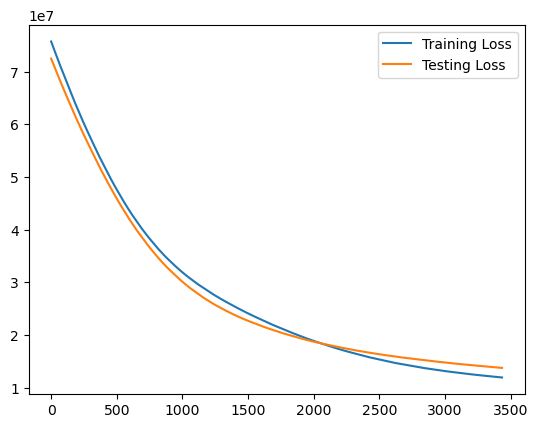

In [45]:
plt.plot(trained_model1.history['loss'],label='Training Loss')
plt.plot(trained_model1.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

In [46]:
#find y_pred
Y_pred=model.predict(X_test)
from sklearn.metrics import r2_score
#find r2 score
print('testing_score',r2_score(Y_test,Y_pred))
Y_pred_t=model.predict(X_train)
print('training_score',r2_score(Y_train,Y_pred_t))

2/2 [==============================] - 0s 3ms/step
testing_score 0.7711032849528398
5/5 [==============================] - 0s 2ms/step
training_score 0.8092730784580098
